In [1]:
from c3s_511_trends import TrendLims1D, assess_trend_consistency

### Influence of autocorrelation on trend estimation

Loaded datafile ehdb_t2m.nc
Subsetted to timeperiod 1902-01-01-2010-12-31
Resampled to Y frequency
Creating a plot with label: None


/net/exo/landclim/crezees/conda/envs/esmval1/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2030: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))


Calculated linear trend test
{'trend_linear': {'pvalue': 6.329758926993055e-12,
                  'slope': 0.14684170461219687,
                  'slope_low': 0.12783631028588816,
                  'slope_up': 0.16584709893850558,
                  'stderr': 0.01900539432630871,
                  'trend': 1}}


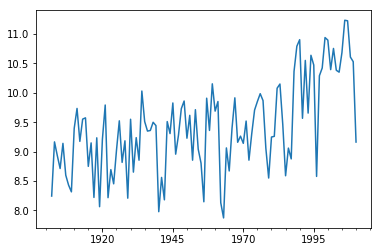

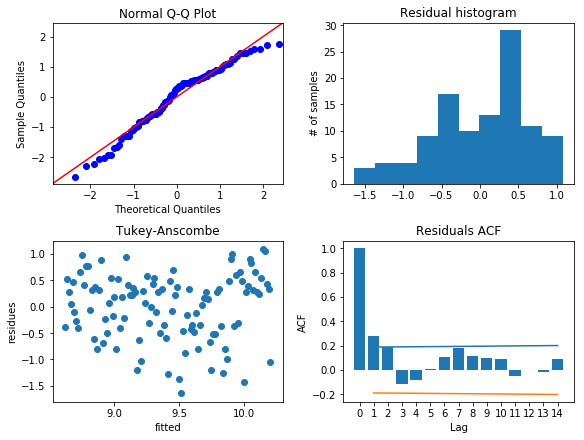

In [9]:
mydat = TrendLims1D('De Bilt T2M','ehdb_t2m.nc')
mydat.subset(slice('1902-01-01','2010-12-31'))
mydat.resample('Y')
mydat.plot()
mydat.trend_linear()
mydat.do_residual_analysis('trend_linear')
mydat.print_stats()
pass

/net/exo/landclim/crezees/conda/envs/esmval1/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


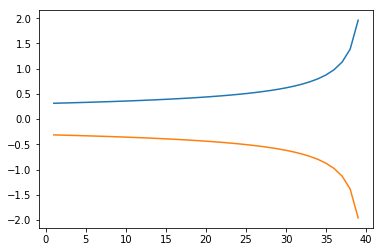

In [10]:

import numpy as np
import matplotlib.pyplot as plt


nlags = 40
res = range(nlags)

lag_axis = np.array(range(nlags+1))

# Now calculate ACF critical values
# From: https://stats.stackexchange.com/questions/185425/how-to-determine-the-critical-values-of-acf
acf_crit = np.array([1.96/np.sqrt(len(res)-x) if x!=0 else np.nan for x in lag_axis])
plt.plot(lag_axis,acf_crit)
plt.plot(lag_axis,-1*acf_crit)


In [8]:
acf_crit

array([<function <lambda> at 0x7f5624f66410>,
       <function <lambda> at 0x7f5624f66320>,
       <function <lambda> at 0x7f5624f662a8>,
       <function <lambda> at 0x7f5624f66230>,
       <function <lambda> at 0x7f5624f661b8>,
       <function <lambda> at 0x7f5624f66140>,
       <function <lambda> at 0x7f5624f660c8>,
       <function <lambda> at 0x7f5624f66050>,
       <function <lambda> at 0x7f563c0cd8c0>,
       <function <lambda> at 0x7f563c0cd668>,
       <function <lambda> at 0x7f5624fc5140>,
       <function <lambda> at 0x7f5624fc5ed8>,
       <function <lambda> at 0x7f5624490d70>,
       <function <lambda> at 0x7f5624490cf8>,
       <function <lambda> at 0x7f5624490c80>,
       <function <lambda> at 0x7f5624490c08>,
       <function <lambda> at 0x7f5624490b90>,
       <function <lambda> at 0x7f5624490b18>,
       <function <lambda> at 0x7f5624490aa0>,
       <function <lambda> at 0x7f5624490a28>,
       <function <lambda> at 0x7f5624490938>,
       <function <lambda> at 0x7f5

Loaded datafile ehdb_t2m.nc
Subsetted to timeperiod 1902-01-01-2017-12-31
Resampled to 5Y frequency
Creating a plot with label: resampled to 5-yearly
Calculated linear trend test


/net/exo/landclim/crezees/conda/envs/esmval1/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2030: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))


{'trend_linear': {'pvalue': 1.7821105916725296e-07,
                  'slope': 0.16681075204954504,
                  'slope_low': 0.1444991180222476,
                  'slope_up': 0.18912238607684248,
                  'stderr': 0.022311634027297442,
                  'trend': 1}}


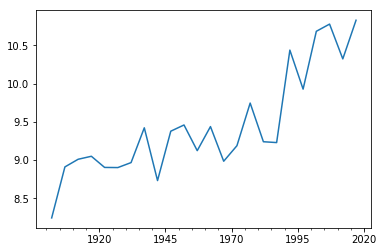

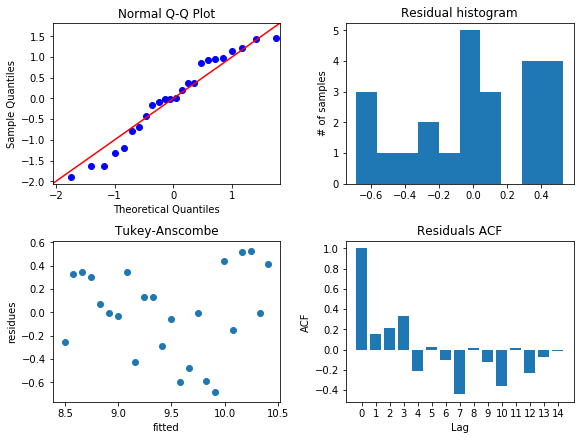

In [23]:
mydat = TrendLims1D('De Bilt T2M','ehdb_t2m.nc')
mydat.subset(slice('1902-01-01','2017-12-31'))
mydat.resample('5Y')
mydat.plot(label='resampled to 5-yearly')
mydat.trend_linear()
mydat.do_residual_analysis('trend_linear')
mydat.print_stats()
pass

In [51]:
mydat.data_cube.units.name

'degree_Celsius'

In [9]:
xaxis = mydat.data_ts.index.to_julian_date()
yaxis = mydat.data_ts.values
results = linregress(xaxis,yaxis)
results_dict = {}
results_dict['slope']=results.slope*(365.25*10) # From /day to /decade
if results.pvalue <= mydat.params['alpha']:
    results_dict['trend'] = int(np.sign(results.slope))
else:
    results_dict['trend'] = int(0)
results_dict['pvalue']=results.pvalue
results_dict['stderr']=results.stderr*(365.25*10)
results_dict['slope_low'] = results_dict['slope']-results_dict['stderr']
results_dict['slope_up'] = results_dict['slope']+results_dict['stderr']


In [13]:
results.intercept

-92.85240004959026

# Test resetting

Loaded datafile ehdb_t2m.nc
Subsetted to timeperiod 1985-01-01-2012-12-31


/net/exo/landclim/crezees/conda/envs/esmval1/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2030: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))


Resampled to Y frequency
Creating a plot with label: resampled to yearly
Calculated Mann-Kendall test
Calculated linear trend test
Calculated Theil-Sen slope


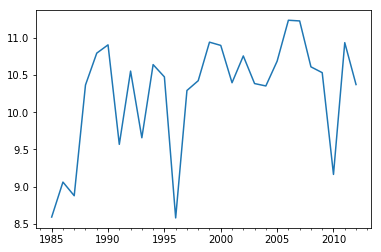

{'trend_linear': {'pvalue': 0.0170631657419087,
                  'slope': 0.417117501462283,
                  'slope_low': 0.25345508994951904,
                  'slope_up': 0.5807799129750469,
                  'stderr': 0.16366241151276392,
                  'trend': 1},
 'trend_mannkendall': {'h': False,
                       'p': 0.060536002358035024,
                       'trend': 0,
                       'z': 1.876869351772299},
 'trend_theilsen': {'slope': 0.35677635721935763,
                    'slope_low': -0.008025765419006348,
                    'slope_up': 0.7239723205566406,
                    'trend': 0}}
Two out of three trend tests indicate no trend.
The two different slopes are fully consistent
Final trend score: 4


4

In [4]:
#detective = TrendInspector()
mydat = TrendLims1D('for testing','ehdb_t2m.nc')
mydat.subset(slice('1985-01-01','2012-12-31'))
mydat.resample('Y')
mydat.plot(label='resampled to yearly')
mydat.do_trends()
plt.show()
mydat.print_stats()
assess_trend_consistency(mydat)

In [2]:
# Consistency
class TrendInspector:
    def __init__(self):
        print("Hello, looking forward to inspect the trends! :-)")
        self.c_score = 0
    def __inspect__(self,inspectme):
        inspectionlist = [inspectme]
        while inspectionlist:
            inspectme = inspectionlist.pop(0)
            if self.__check_consistency__(inspectme):
                pass
                #self.c_score += 1
                # Now split the dataset
                #TODO only split while above a certain treshold
                #a,b = copy.deepcopy(inspectme),copy.deepcopy(inspectme) # Create two copies
                #a.subset(slice('1902','1960')) # First half of dataset
                #b.subset(slice('1961','2010'))
                #inspectionlist.append([a,b])
                # For this timelength the trend tests were found to be consistent. Now split in two and check if it is still consistent.
        self.__close_and_summarize__()
    def __check_consistency__(self,inspectme):
        if inspectme.stats_summary['trend_linear']['trend']==inspectme.stats_summary['trend_mannkendall']['trend']:
            print("Two trend methods")
            #self.c_score += 1
            #return True
        elif inspectme.stats_summary['trend_linear']['trend']+inspectme.stats_summary['trend_mannkendall']['trend']==0:
            return False
    def __close_and_summarize__(self):
        print("The score for this dataset is: {0}".format(self.c_score))
     

SyntaxError: EOL while scanning string literal (<ipython-input-2-8b30fce6f28a>, line 23)

In [81]:
# Test consistency


The different trend tests are fully consistent and indicate a positive trend.
The two different slopes are fully consistent
Final trend score: 5


5

SyntaxError: invalid syntax (<ipython-input-78-8913f1744c84>, line 1)

Loaded datafile ehdb_t2m.nc
Subsetted to timeperiod 1902-01-01-2002-12-31
Resampled to Y frequency
Creating a plot with label: resampled to yearly


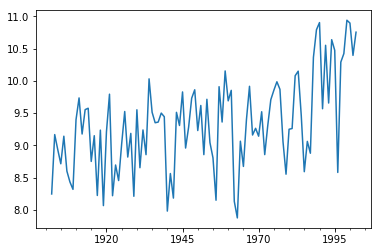

Creating a plot with label: resetted


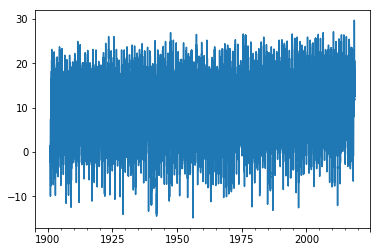

In [142]:
mydat = TrendLims1D('for testing','ehdb_t2m.nc')
mydat.subset(slice('1902-01-01','2002-12-31'))
mydat.resample('Y')
mydat.plot(label='resampled to yearly')


plt.show()
mydat.reset()
mydat.plot(label='resetted')
plt.show()

In [144]:
mydat.split()

('asdfasdf', 'asdfasdf')

Loaded datafile ehdb_t2m.nc
Subsetted to timeperiod 1902-01-01-1952-12-31
Resampled to Y frequency
Creating a plot with label: None
{'trend_mannkendall': {'trend': 1, 'h': True, 'z': 1.9980859028996083, 'p': 0.04570734780072727}, 'trend_linear': {'slope': 0.09891112501268239, 'trend': 0, 'pvalue': 0.05173065651537076, 'stderr': 1.3580817544271232e-05}}


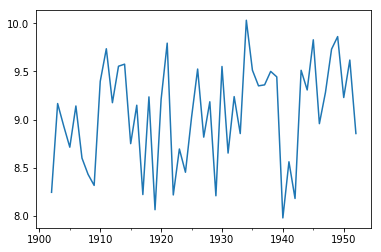

In [128]:
mydat = TrendLims1D('for testing','ehdb_t2m.nc')
mydat.subset(slice('1902-01-01','1952-12-31'))
mydat.resample('Y')
mydat.plot()
#mydat.plot()
mydat.trend_mktest()
mydat.trend_linear()
print(mydat.stats_summary)
#mydat.data_ts.resample('Y').mean()

In [46]:
import pprint

In [47]:
pprint.pprint("hallo")

'hallo'
